Q1:
We assume homogeneous concentrations, and the reaction rates are given by the mass action law.The four equations are given below:
$$
\begin{align}
\frac{d[E]}{dt}=k_2[ES]+k_3[ES]-k_1[E][S] \tag{1}\\
\frac{d[S]}{dt}=k_2[ES]-k_1[E][S] \tag{2}\\
\frac{d[ES]}{dt}=k_1[ES]-k_2[ES]-k_2[ES] \tag{3}\\
\frac{d[P]}{dt}=k_3[ES] \tag{4}
\end{align}
$$

Q2:Code

In [11]:
import numpy as np
import matplotlib.pyplot as plt

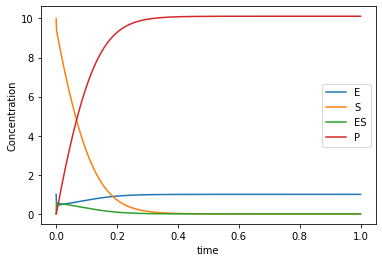

In [23]:
def func_E(t, E, S, ES, P):
    return k1*E*S - k2*ES - k3*ES

def func_S(t, E, S, ES, P):
    return k1*E*S - k2*ES

def func_ES(t, E, S, ES, P):
    return k1*E*S - k2*ES - k3*ES

def func_P(t, E, S, ES, P):
    return k3*ES

#Initialize
#The rate constants are: k1=100/µM/min, k2=600/min, k3=150/min. 
k1 = 100
k2 = 600
k3 = 150

#The initial concentration of E is 1 µM, 
#The initial concentration of S is 10 µM, 
#The initial concentrations of ES and P are both 0. 
E = [1]
S = [10]
ES = [0]
P = [0]

t = [0]
h = 0.0001   #precision
N = 10000    #iterations

#the fourth-order Runge-Kutta method[1][2]
for i in range(N):

    kE1 = func_E(t[-1], E[-1], S[-1], ES[-1], P[-1])
    kE2 = func_E(t[-1]+h/2, E[-1]+kE1*h/2, S[-1]+kE1*h/2, ES[-1]+kE1*h/2, P[-1]+h*kE1/2)
    kE3 = func_E(t[-1]+h/2, E[-1]+kE2*h/2, S[-1]+kE2*h/2, ES[-1]+kE2*h/2, P[-1]+h*kE2/2)
    kE4 = func_E(t[-1]+h, E[-1]+h*kE3, S[-1]+h*kE3, ES[-1]+h*kE3,P[-1]+h*kE3)
    Et = E[-1] - h/6*(kE1 + 2*kE2 + 2*kE3 + kE4)
    
    kS1 = func_S(t[-1], E[-1], S[-1], ES[-1], P[-1])
    kS2 = func_S(t[-1] + 0.5*h, E[-1] + 0.5*h*kS1, S[-1] + 0.5*h*kS1, ES[-1] + 0.5*h*kS1, P[-1] + 0.5*h*kS1)
    kS3 = func_S(t[-1] + 0.5*h, E[-1] + 0.5*h*kS2, S[-1] + 0.5*h*kS2, ES[-1] + 0.5*h*kS2, P[-1] + 0.5*h*kS2)
    kS4 = func_S(t[-1] + h, E[-1] + h*kS3, S[-1] + h*kS3, ES[-1] + h*kS3, P[-1] + h*kS3)
    St = S[-1] - h/6*(kS1 + 2*kS2 + 2*kS3 + kS4)

    kES1 = func_ES(t[-1], E[-1], S[-1], ES[-1], P[-1])
    kES2 = func_ES(t[-1] + 0.5*h, E[-1] + 0.5*h*kES1, S[-1] + 0.5*h*kES1, ES[-1] + 0.5*h*kES1, P[-1] + 0.5*h*kES1)
    kES3 = func_ES(t[-1] + 0.5*h, E[-1] + 0.5*h*kES2, S[-1] + 0.5*h*kES2, ES[-1] + 0.5*h*kES2, P[-1] + 0.5*h*kES2)
    kES4 = func_ES(t[-1] + h, E[-1] + h*kES3, S[-1] + h*kES3, ES[-1] + h*kES3, P[-1] + h*kES3)
    ESt = ES[-1] + h/6*(kES1 + 2*kES2 + 2*kES3 + kES4)

    kP1 = func_P(t[-1], E[-1], S[-1], ES[-1], P[-1])
    kP2 = func_P(t[-1] + 0.5*h, E[-1] + 0.5*h*kP1, S[-1] + 0.5*h*kP1, ES[-1] + 0.5*h*kP1, P[-1] + 0.5*h*kP1)
    kP3 = func_P(t[-1] + 0.5*h, E[-1] + 0.5*h*kP2, S[-1] + 0.5*h*kP2, ES[-1] + 0.5*h*kP2, P[-1] + 0.5*h*kP2)
    kP4 = func_P(t[-1] + h, E[-1] + h*kP3, S[-1] + h*kP3, ES[-1] + h*kP3, P[-1] + h*kP3)
    Pt = P[-1] + h/6*(kP1 + 2*kP2 + 2*kP3 + kP4)

    S.append(St)
    E.append(Et)
    ES.append(ESt)
    P.append(Pt)
    t.append(t[-1] + h)
    
plt.plot(t, E, label='E')
plt.plot(t, S, label='S')
plt.plot(t, ES, label='ES')
plt.plot(t, P, label='P')
plt.xlabel('time')
plt.ylabel('Concentration')

plt.legend()
plt.show()
    

Q3:

$$ V=\frac{d[P]}{dt}=k_3[ES] $$

Vm = 82.7314 uM/min


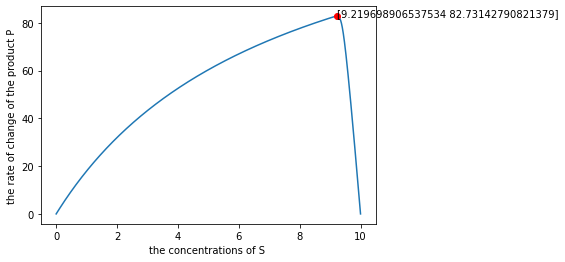

In [40]:
V = []

# the rate of change of the product P
for i in range(len(ES)):
    V.append(k3*ES[i])

# find the index of the maximum
Vm = max(V)
index = V.index(Vm)

print("Vm = "+ "%.4f" %Vm +" uM/min")

plt.xlabel('the concentrations of S ')
plt.ylabel('the rate of change of the product P')
plt.plot(S,V)
plt.plot(S[index],V[index],'ro') 
show_max='['+str(S[index])+' '+str(Vm)+']'
plt.annotate(show_max,xytext=(S[index],V[index]),xy=(S[index],V[index]))
plt.show()

References:<p>
[1] Runge-Kutta RK4 Method. (n.d.).Retrieved December 25, 2022,from : https://byjus.com/maths/runge-kutta-rk4-method/#:~:text=What%20is%20Fourth%20Order%20RK,for%20a%20given%20point%20x.<br>
[2] Runge–Kutta methods. (n.d.).Retrieved December 25, 2022,from :https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods